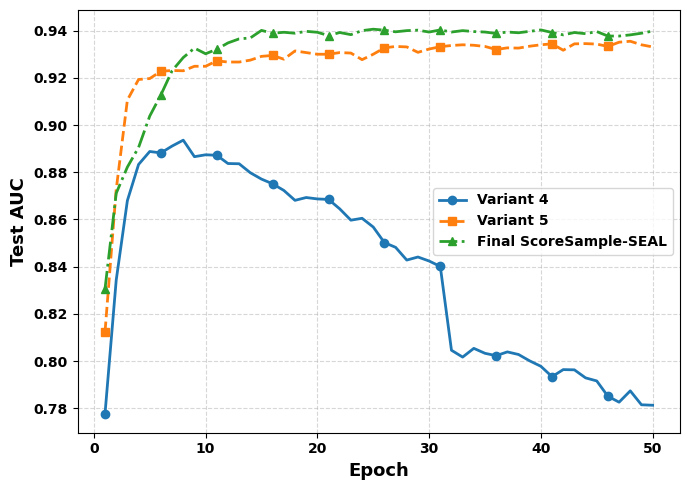

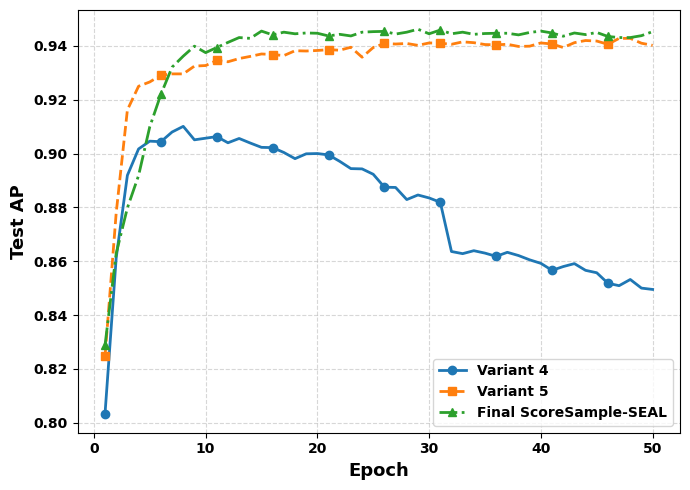

In [1]:
import matplotlib.pyplot as plt 
import re
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/Cora/4.txt', './result/Cora/5.txt', './result/Cora/final.txt']
labels = ['Variant 4', 'Variant 5', 'Final ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

plt.figure(figsize=(7, 5))
for idx, log_file in enumerate(log_files):
    epochs, test_auc, test_ap = extract_metrics(log_file)
    style, color = styles[idx]
    plt.plot(epochs, test_auc, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Test AUC', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for idx, log_file in enumerate(log_files):
    epochs, test_auc, test_ap = extract_metrics(log_file)
    style, color = styles[idx]
    plt.plot(epochs, test_ap, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Test AP', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


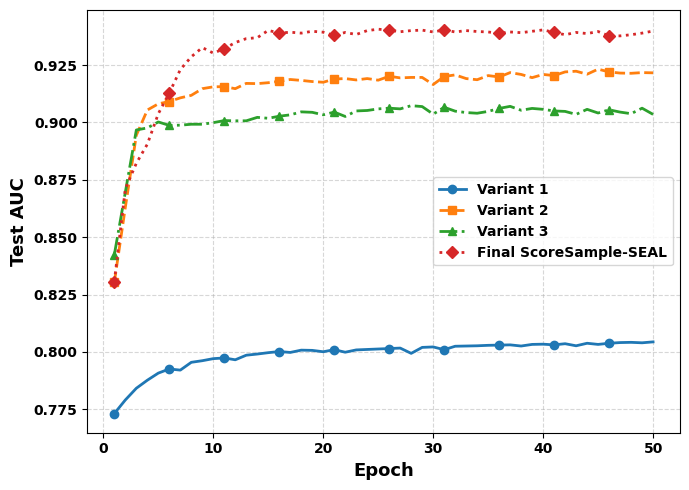

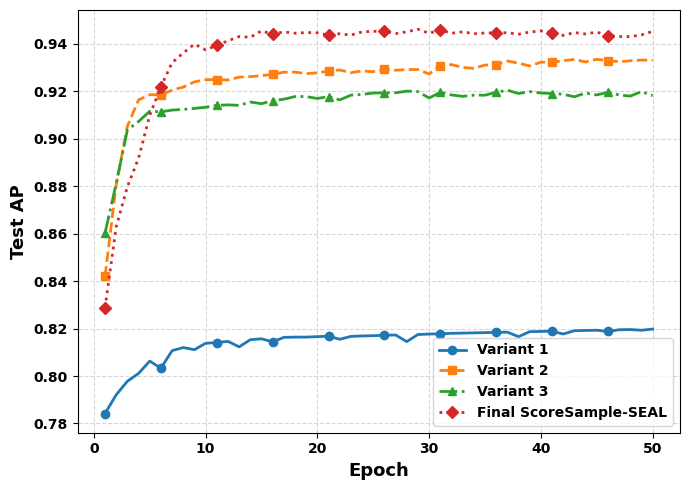

In [2]:
import matplotlib.pyplot as plt 
import re
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/Cora/1.txt', './result/Cora/2.txt', './result/Cora/3.txt', './result/Cora/final.txt']
labels = ['Variant 1', 'Variant 2', 'Variant 3', 'Final ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green'),
    ('D:', 'tab:red')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

plt.figure(figsize=(7, 5))
for idx, log_file in enumerate(log_files):
    epochs, test_auc, test_ap = extract_metrics(log_file)
    style, color = styles[idx]
    plt.plot(epochs, test_auc, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Test AUC', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for idx, log_file in enumerate(log_files):
    epochs, test_auc, test_ap = extract_metrics(log_file)
    style, color = styles[idx]
    plt.plot(epochs, test_ap, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Test AP', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


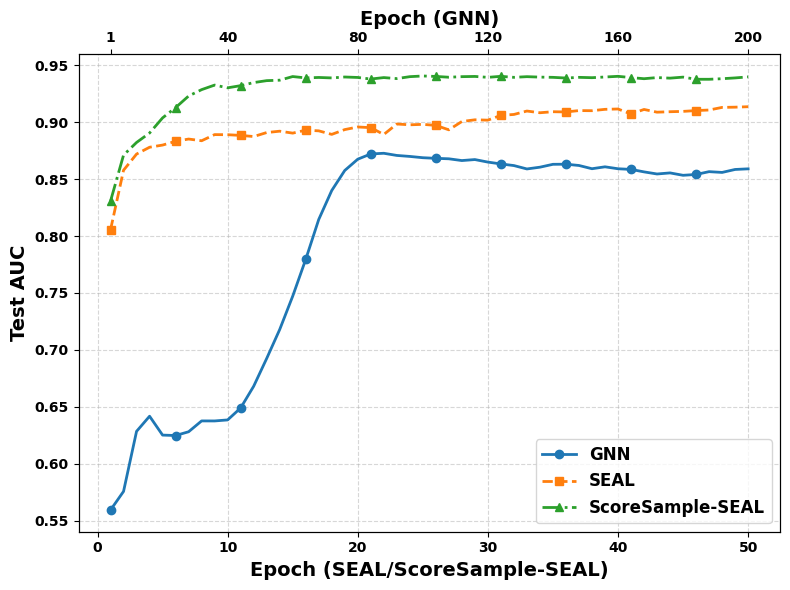

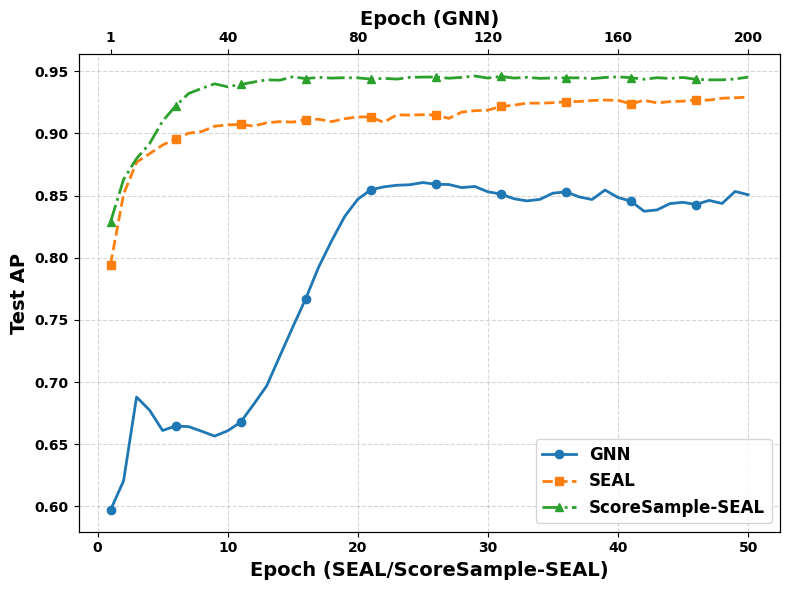

In [3]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/Cora/gnn.txt', './result/Cora/seal.txt', './result/Cora/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            # GNN下采样到50点，并对齐x_main
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

main_plot('auc')
main_plot('ap')


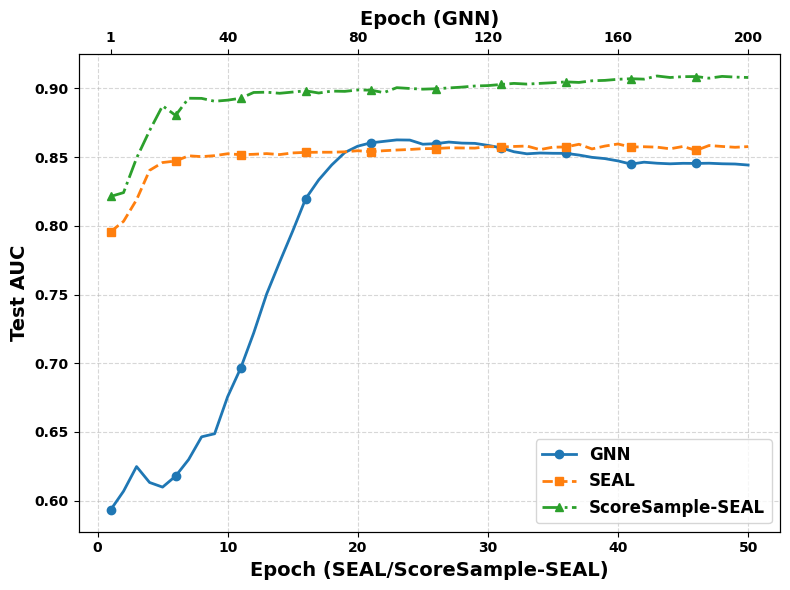

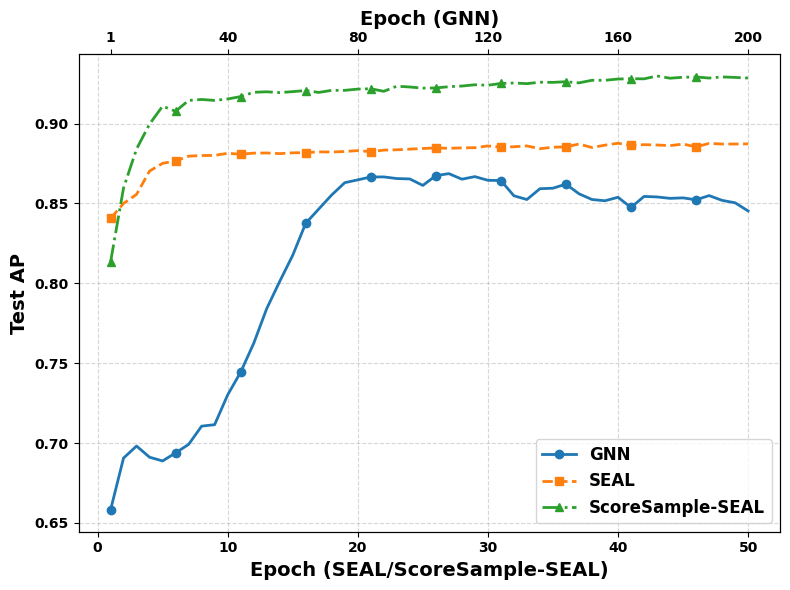

In [4]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/CiteSeer/gnn.txt', './result/CiteSeer/seal.txt', './result/CiteSeer/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            # 保证y长度为50
            if len(y) > 50:
                y = y[:50]
            elif len(y) < 50:
                y = list(y) + [y[-1]] * (50 - len(y))
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


main_plot('auc')
main_plot('ap')


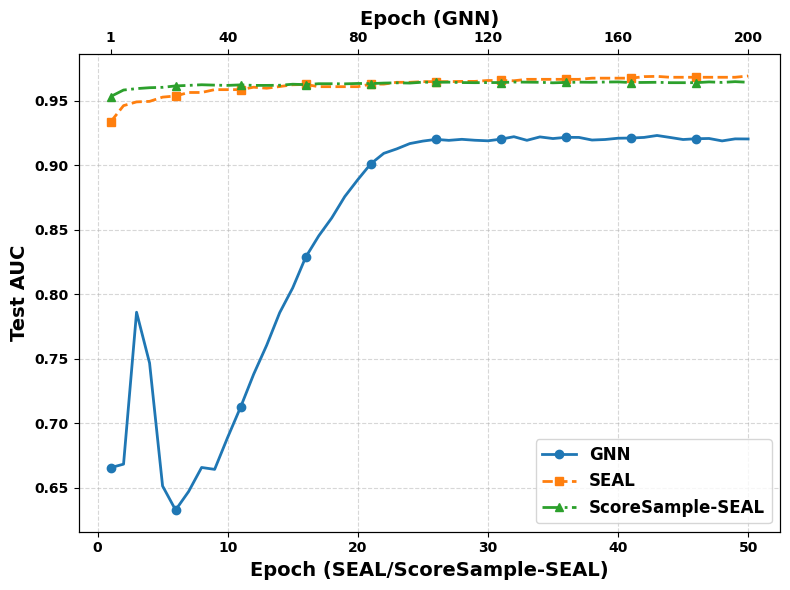

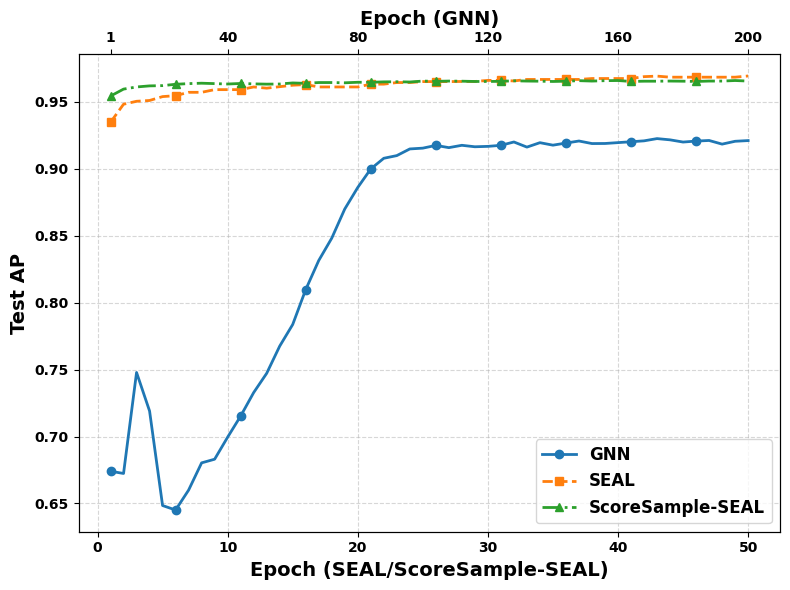

In [5]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/PubMed/gnn.txt', './result/PubMed/seal.txt', './result/PubMed/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            # 保证y长度为50
            if len(y) > 50:
                y = y[:50]
            elif len(y) < 50:
                y = list(y) + [y[-1]] * (50 - len(y))
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


main_plot('auc')
main_plot('ap')


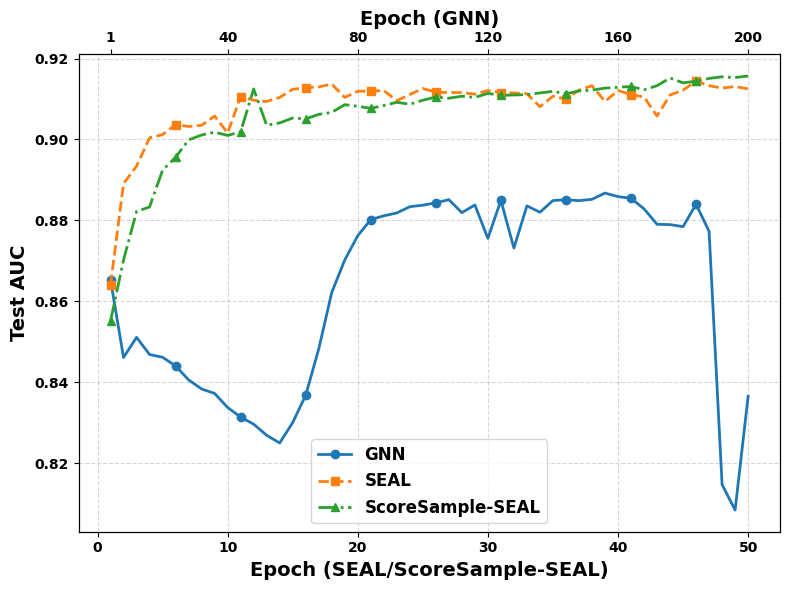

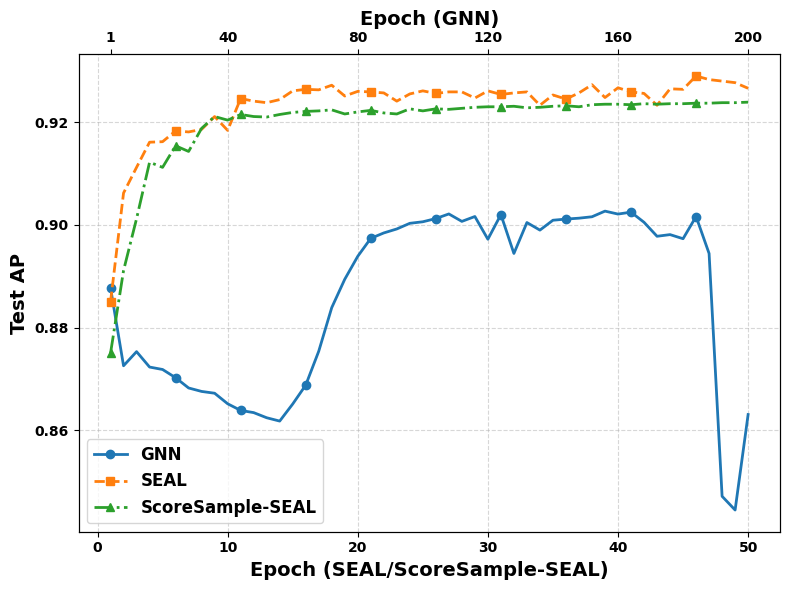

In [6]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/Github/gnn.txt', './result/Github/seal.txt', './result/Github/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            # 保证y长度为50
            if len(y) > 50:
                y = y[:50]
            elif len(y) < 50:
                y = list(y) + [y[-1]] * (50 - len(y))
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


main_plot('auc')
main_plot('ap')


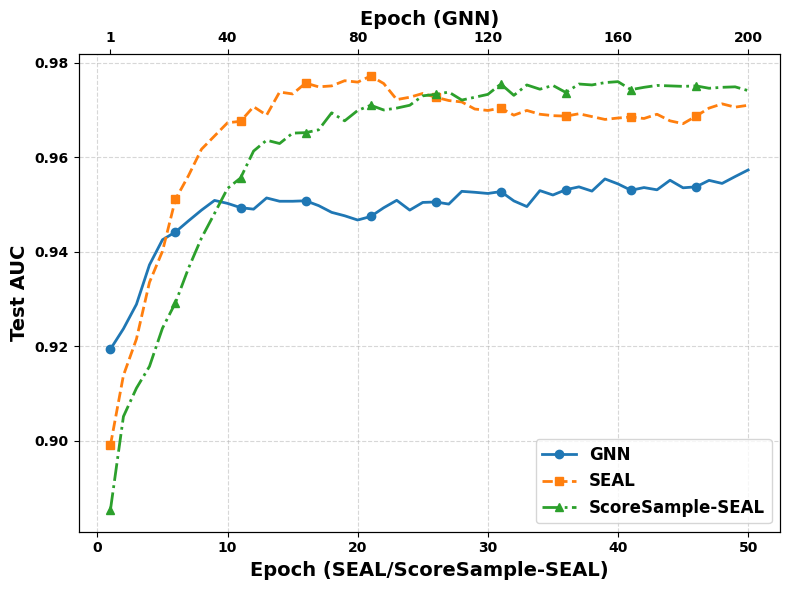

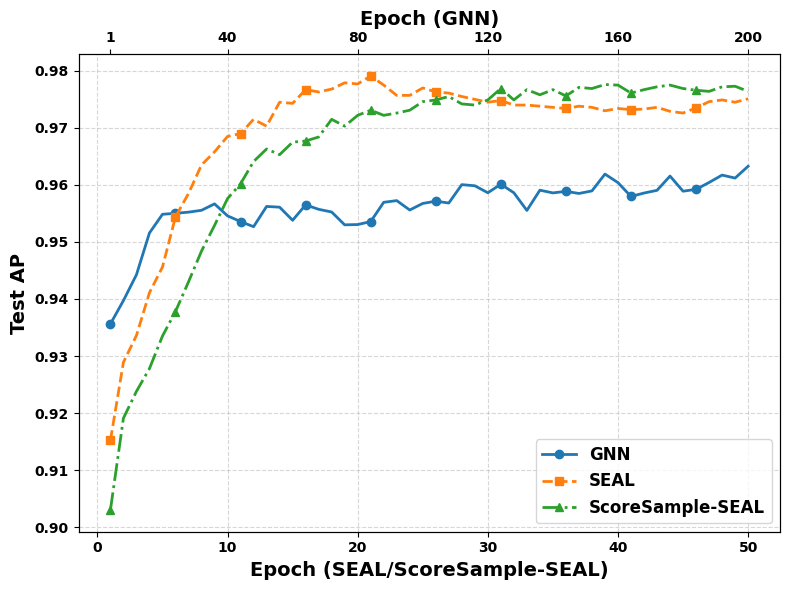

In [7]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/USAir/gnn.txt', './result/USAir/seal.txt', './result/USAir/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            # 保证y长度为50
            if len(y) > 50:
                y = y[:50]
            elif len(y) < 50:
                y = list(y) + [y[-1]] * (50 - len(y))
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


main_plot('auc')
main_plot('ap')


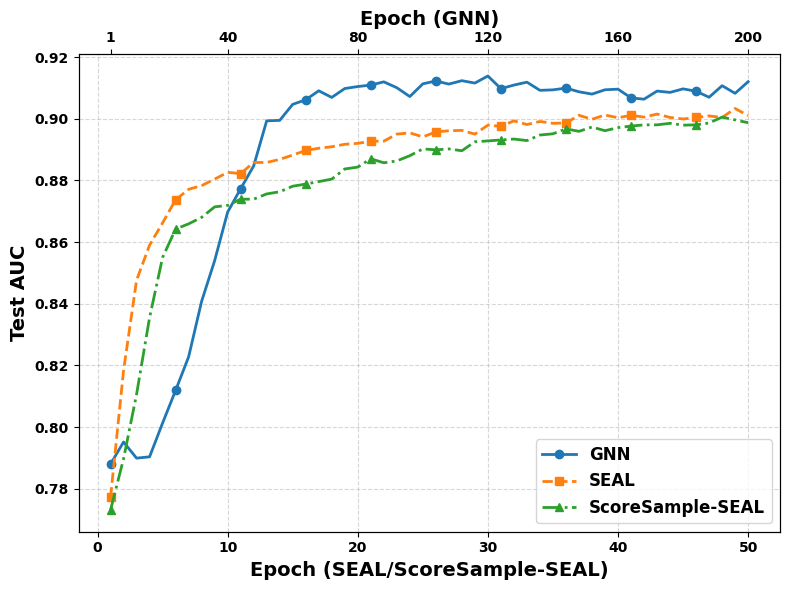

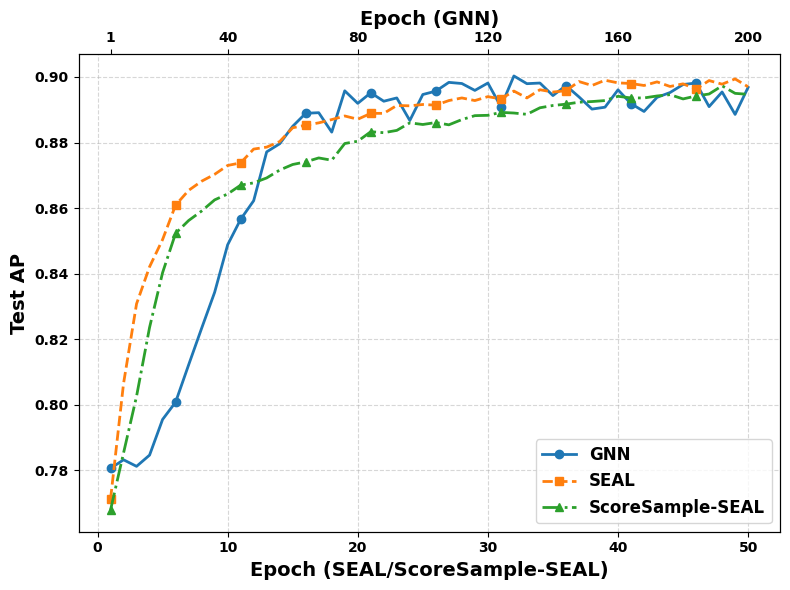

In [8]:
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib

# 字体加粗
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'

log_files = ['./result/Celegans/gnn.txt', './result/Celegans/seal.txt', './result/Celegans/final.txt']
labels = ['GNN', 'SEAL', 'ScoreSample-SEAL']
styles = [
    ('o-', 'tab:blue'),
    ('s--', 'tab:orange'),
    ('^-.', 'tab:green')
]

def extract_metrics(log_file):
    epochs, test_auc, test_ap = [], [], []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            m = re.search(r'Epoch: *(\d+).*Test_AUC: ([\d.]+), Test_AP: ([\d.]+)', line)
            if m:
                epochs.append(int(m.group(1)))
                test_auc.append(float(m.group(2)))
                test_ap.append(float(m.group(3)))
    return epochs, test_auc, test_ap

def downsample_metric(metric, out_len=50):
    factor = len(metric) // out_len
    return [np.mean(metric[i*factor:(i+1)*factor]) for i in range(out_len)]

def main_plot(metric_type='auc'):
    plt.figure(figsize=(8, 6))
    # x轴映射：seal类为1~50，gnn为1~200
    x_main = np.arange(1, 51)
    x_gnn = np.linspace(1, 200, 50).astype(int)
    for idx, log_file in enumerate(log_files):
        epochs, test_auc, test_ap = extract_metrics(log_file)
        style, color = styles[idx]
        if idx == 0:
            y = downsample_metric(test_auc if metric_type=='auc' else test_ap, 50)
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
        else:
            y = test_auc if metric_type=='auc' else test_ap
            # 保证y长度为50
            if len(y) > 50:
                y = y[:50]
            elif len(y) < 50:
                y = list(y) + [y[-1]] * (50 - len(y))
            plt.plot(x_main, y, style, color=color, label=labels[idx], markersize=6, linewidth=2, markevery=5)
    plt.xlabel('Epoch (SEAL/ScoreSample-SEAL)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Test {metric_type.upper()}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    # 增加副x轴
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([1, 10, 20, 30, 40, 50])
    ax2.set_xticklabels([1, 40, 80, 120, 160, 200])
    ax2.set_xlabel('Epoch (GNN)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


main_plot('auc')
main_plot('ap')
